In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

In [2]:
# Load the model outputs for the year 2000
# One year is enough for the test we want to do here
sectorwater_simulation_outputs = xr.open_dataset("/glade/work/staranu/paper1_data_simulations/paper1_sectorwater_run.clm2.h1.1971-2010.nc", decode_times=False)

# Calculate the start and end days for 2000
start_year = 1971
target_year = 2000
start_day_2000 = (target_year - start_year) * 365
end_day_2000 = start_day_2000 + 365

# Select the data for 2000
sectorwater_simulation_outputs_year_2000 = sectorwater_simulation_outputs.isel(time=slice(start_day_2000, end_day_2000))
del sectorwater_simulation_outputs
sectorwater_simulation_outputs_year_2000

# First, convert the time dimension to a standard datetime format
base_time = pd.Timestamp('1971-01-01')  # Adjust based on your dataset's reference date
days_since_base = sectorwater_simulation_outputs_year_2000['time']  # Assuming 'time' is the name of your time dimension
actual_dates = base_time + pd.to_timedelta(days_since_base, unit='D')
sectorwater_simulation_outputs_year_2000['time'] = actual_dates

# Now resample to monthly data
# Replace 'mean' with an appropriate aggregation function for your data
sectorwater_simulation_outputs_year_2000 = sectorwater_simulation_outputs_year_2000.resample(time='M').mean()*(365.0/12.0)
sectorwater_simulation_outputs_year_2000

<xarray.Dataset>
Dimensions:              (lon: 288, lat: 192, time: 13, bnds: 2)
Coordinates:
  * lon                  (lon) float32 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lat                  (lat) float32 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * time                 (time) datetime64[ns] 1999-12-31 ... 2000-12-31
Dimensions without coordinates: bnds
Data variables: (12/28)
    time_bnds            (time, bnds) float64 3.22e+05 3.221e+05 ... 3.327e+05
    DOM_ACTUAL_CONS      (time, lat, lon) float32 0.0 0.0 0.0 ... nan nan nan
    DOM_ACTUAL_RF        (time, lat, lon) float32 0.0 0.0 0.0 ... nan nan nan
    DOM_ACTUAL_WITHD     (time, lat, lon) float32 0.0 0.0 0.0 ... nan nan nan
    DOM_EXPECTED_CONS    (time, lat, lon) float32 0.0 0.0 0.0 ... nan nan nan
    DOM_EXPECTED_WITHD   (time, lat, lon) float32 0.0 0.0 0.0 ... nan nan nan
    ...                   ...
    MIN_ACTUAL_RF        (time, lat, lon) float32 0.0 0.0 0.0 ... nan nan nan
    MIN_ACTUAL_WITHD     (time, lat, lon) float32 0.0 0.0 0.0 ... nan nan nan
    MIN_EXPECTED_CONS    (time, lat, lon) float32 0.0 0.0 0.0 ... nan nan nan
    MIN_EXPECTED_WITHD   (time, lat, lon) float32 0.0 0.0 0.0 ... nan nan nan
    QIRRIG_DEMAND        (time, lat, lon) float32 0.0 0.0 0.0 ... nan nan nan
    QIRRIG_FROM_SURFACE  (time, lat, lon) float32 0.0 0.0 0.0 ... nan nan nan
Attributes: (12/101)
    CDI:                                  Climate Data Interface version 1.9....
    Conventions:                          CF-1.0
    source:                               Community Terrestrial Systems Model
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    history:                              Thu Apr 13 02:05:32 2023: cdo merge...
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     day_1
    CDO:                                  Climate Data Operators version 1.9....

In [3]:
# Load the input data for year 2000
input_data_year_2000 = xr.open_dataset('/glade/work/staranu/sectorWater_tools/tools/mksurfdata_map/surfdata_for_each_year/2000/surfdata_0.9x1.25_hist_78pfts_CMIP6_simyr2000_c230217.nc', decode_times=False)
input_data_year_2000

<xarray.Dataset>
Dimensions:                  (lsmlat: 192, lsmlon: 288, nlevsoi: 10,
                              natpft: 15, cft: 64, time: 12, lsmpft: 79,
                              numurbl: 3, numrad: 2, nlevurb: 5, nglcecp1: 11,
                              nglcec: 10)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16 17 18 19 20 ... 73 74 75 76 77 78
  * time                     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lsmlat, lsmlon, nlevsoi, lsmpft, numurbl,
                                numrad, nlevurb, nglcecp1, nglcec
Data variables: (12/87)
    mxsoil_color             int32 ...
    SOIL_COLOR               (lsmlat, lsmlon) int32 ...
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float64 ...
    PCT_CLAY                 (nlevsoi, lsmlat, lsmlon) float64 ...
    ORGANIC                  (nlevsoi, lsmlat, lsmlon) float64 ...
    FMAX                     (lsmlat, lsmlon) float64 ...
    ...                       ...
    CONST_HARVEST_SH2        (lsmlat, lsmlon) float64 ...
    CONST_HARVEST_SH3        (lsmlat, lsmlon) float64 ...
    CONST_GRAZING            (lsmlat, lsmlon) float64 ...
    CONST_FERTNITRO_CFT      (cft, lsmlat, lsmlon) float64 ...
    UNREPRESENTED_PFT_LULCC  (natpft, lsmlat, lsmlon) float64 ...
    UNREPRESENTED_CFT_LULCC  (cft, lsmlat, lsmlon) float64 ...
Attributes: (12/49)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 02-17-23 12:03:18
    Logname:                              staranu
    Host:                                 cheyenne1
    Source:                               Community Land Model: CLM5
    Version:                              ctsm5.1.dev085-134-g737a8c9bd/glade...
    ...                                   ...
    Soil_texture_raw_data_file_name:      mksrf_soitex.10level.c010119.nc
    Soil_color_raw_data_file_name:        mksrf_soilcolor_CMIP6_simyr2005.c17...
    Fmax_raw_data_file_name:              mksrf_fmax_0.125x0.125_c200220.nc
    Organic_matter_raw_data_file_name:    mksrf_organic_10level_5x5min_ISRIC-...
    Lai_raw_data_file_name:               mksrf_lai_78pfts_simyr2005.c170413.nc
    Vegetation_type_raw_data_filename:    mksrf_landuse_histclm50_LUH2_2000.c...

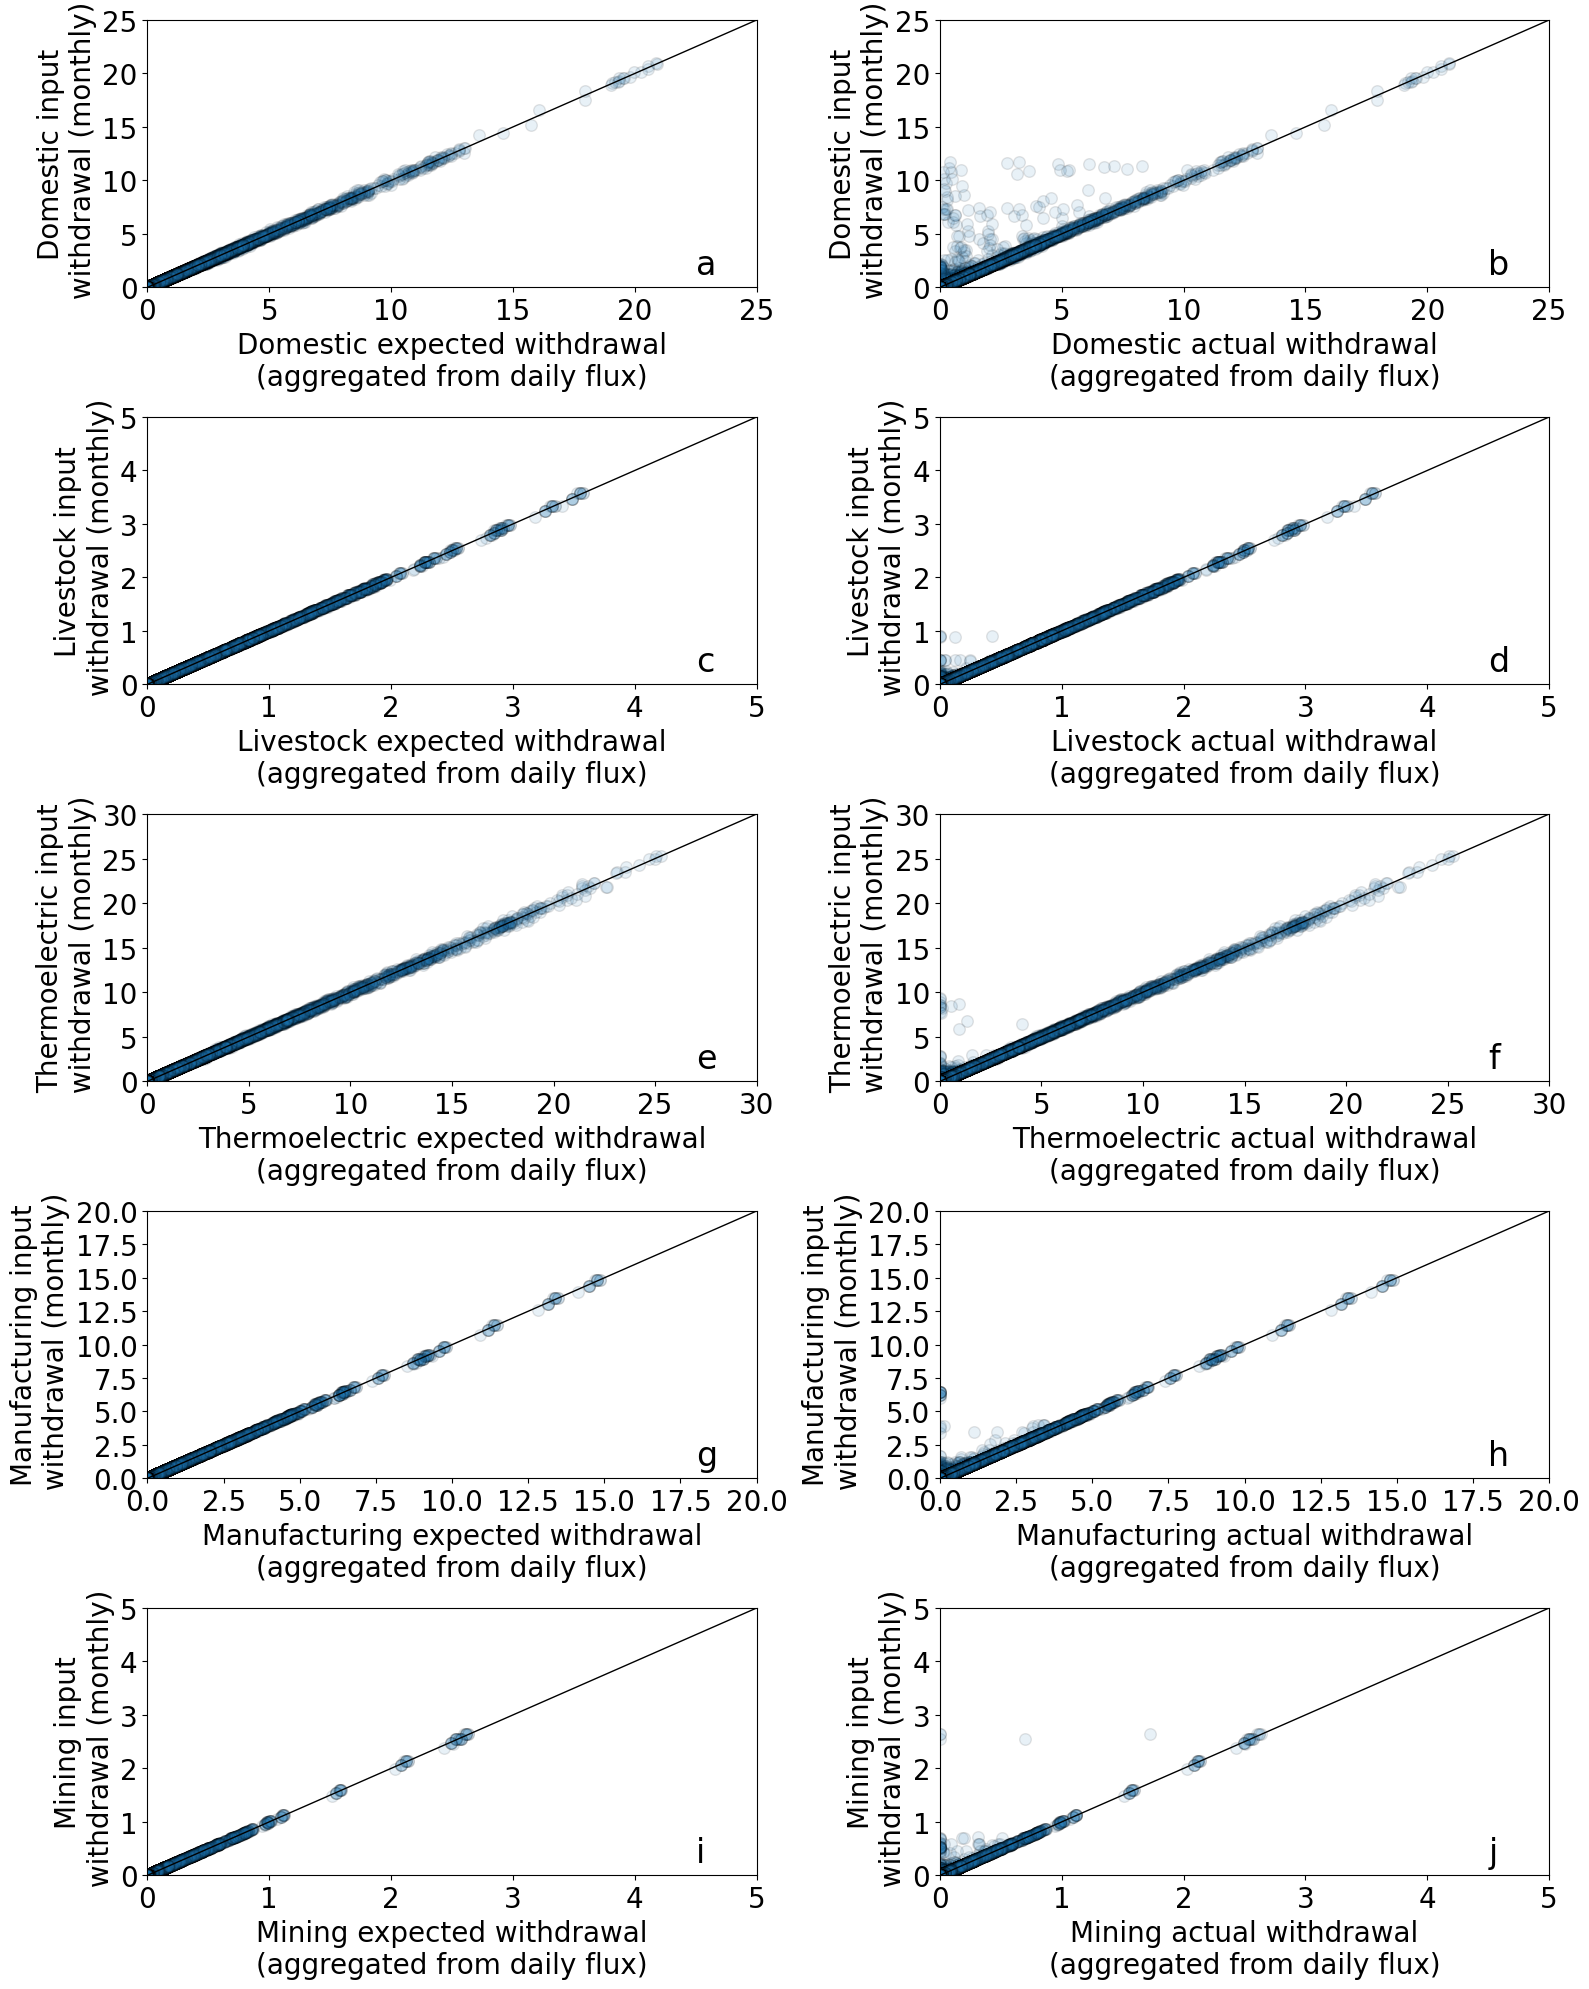

In [4]:
# Create a 5x2 grid of subplots
fig, ax = plt.subplots(5, 2, figsize=(16, 20))

# Define the sectors and their labels
sectors = ['DOM', 'LIV', 'ELEC', 'MFC', 'MIN']
labels = ['Domestic', 'Livestock', 'Thermoelectric', 'Manufacturing', 'Mining']

# Define axis limits for each sector (user-adjustable)
axis_limits = {
    'DOM': {'xlim': [0, 25], 'ylim': [0, 25]},
    'LIV': {'xlim': [0, 5], 'ylim': [0, 5]},
    'ELEC': {'xlim': [0, 30], 'ylim': [0, 30]},
    'MFC': {'xlim': [0, 20], 'ylim': [0, 20]},
    'MIN': {'xlim': [0, 5], 'ylim': [0, 5]}
}

# Iterate over sectors and axes to plot each sector's data
for i, (sector, label) in enumerate(zip(sectors, labels)):
    # First column: expected withdrawal
    ax[i, 0].scatter(
        x = sectorwater_simulation_outputs_year_2000[f'{sector}_EXPECTED_WITHD'].values[1:,:,:] * 86400,
        y = input_data_year_2000[f'withd_{sector.lower()}'], 
        s=70, alpha=0.1, edgecolors="k"
    )
    ax[i, 0].set_xlabel(f"{label} expected withdrawal\n(aggregated from daily flux)")
    ax[i, 0].set_ylabel(f"{label} input\n withdrawal (monthly)")
    ax[i, 0].set_xlim(axis_limits[sector]['xlim'])
    ax[i, 0].set_ylim(axis_limits[sector]['ylim'])
    ax[i, 0].annotate(chr(97 + i*2), xy=(0.9, 0.05), xycoords='axes fraction', fontsize=24, color='k')
    b, a = np.polyfit(axis_limits[sector]['xlim'], axis_limits[sector]['ylim'], deg=1)
    xseq = np.linspace(axis_limits[sector]['xlim'][0], axis_limits[sector]['xlim'][1], num=100)
    ax[i, 0].plot(xseq, a + b * xseq, color="k", lw=1.0)

    # Second column: actual withdrawal
    ax[i, 1].scatter(
        x = sectorwater_simulation_outputs_year_2000[f'{sector}_ACTUAL_WITHD'].values[1:,:,:] * 86400,
        y = input_data_year_2000[f'withd_{sector.lower()}'], 
        s=70, alpha=0.1, edgecolors="k"
    )
    ax[i, 1].set_xlabel(f"{label} actual withdrawal\n(aggregated from daily flux)")
    ax[i, 1].set_ylabel(f"{label} input\n withdrawal (monthly)")
    ax[i, 1].set_xlim(axis_limits[sector]['xlim'])
    ax[i, 1].set_ylim(axis_limits[sector]['ylim'])
    ax[i, 1].annotate(chr(98 + i*2), xy=(0.9, 0.05), xycoords='axes fraction', fontsize=24, color='k')
    b, a = np.polyfit(axis_limits[sector]['xlim'], axis_limits[sector]['ylim'], deg=1)
    xseq = np.linspace(axis_limits[sector]['xlim'][0], axis_limits[sector]['xlim'][1], num=100)
    ax[i, 1].plot(xseq, a + b * xseq, color="k", lw=1.0)

# Adjust font size for all axes
for axis in ax.flatten():
    for item in ([axis.title, axis.xaxis.label, axis.yaxis.label] +
                axis.get_xticklabels() + axis.get_yticklabels()):
        item.set_fontsize(20)

# Adjust layout
fig.tight_layout()

#Save plot
plt.savefig("Results/png_format/input_vs_model_withd.png", format='png', edgecolor='none', dpi=600, bbox_inches='tight', pad_inches=0.5)
# Show the plot
plt.show()



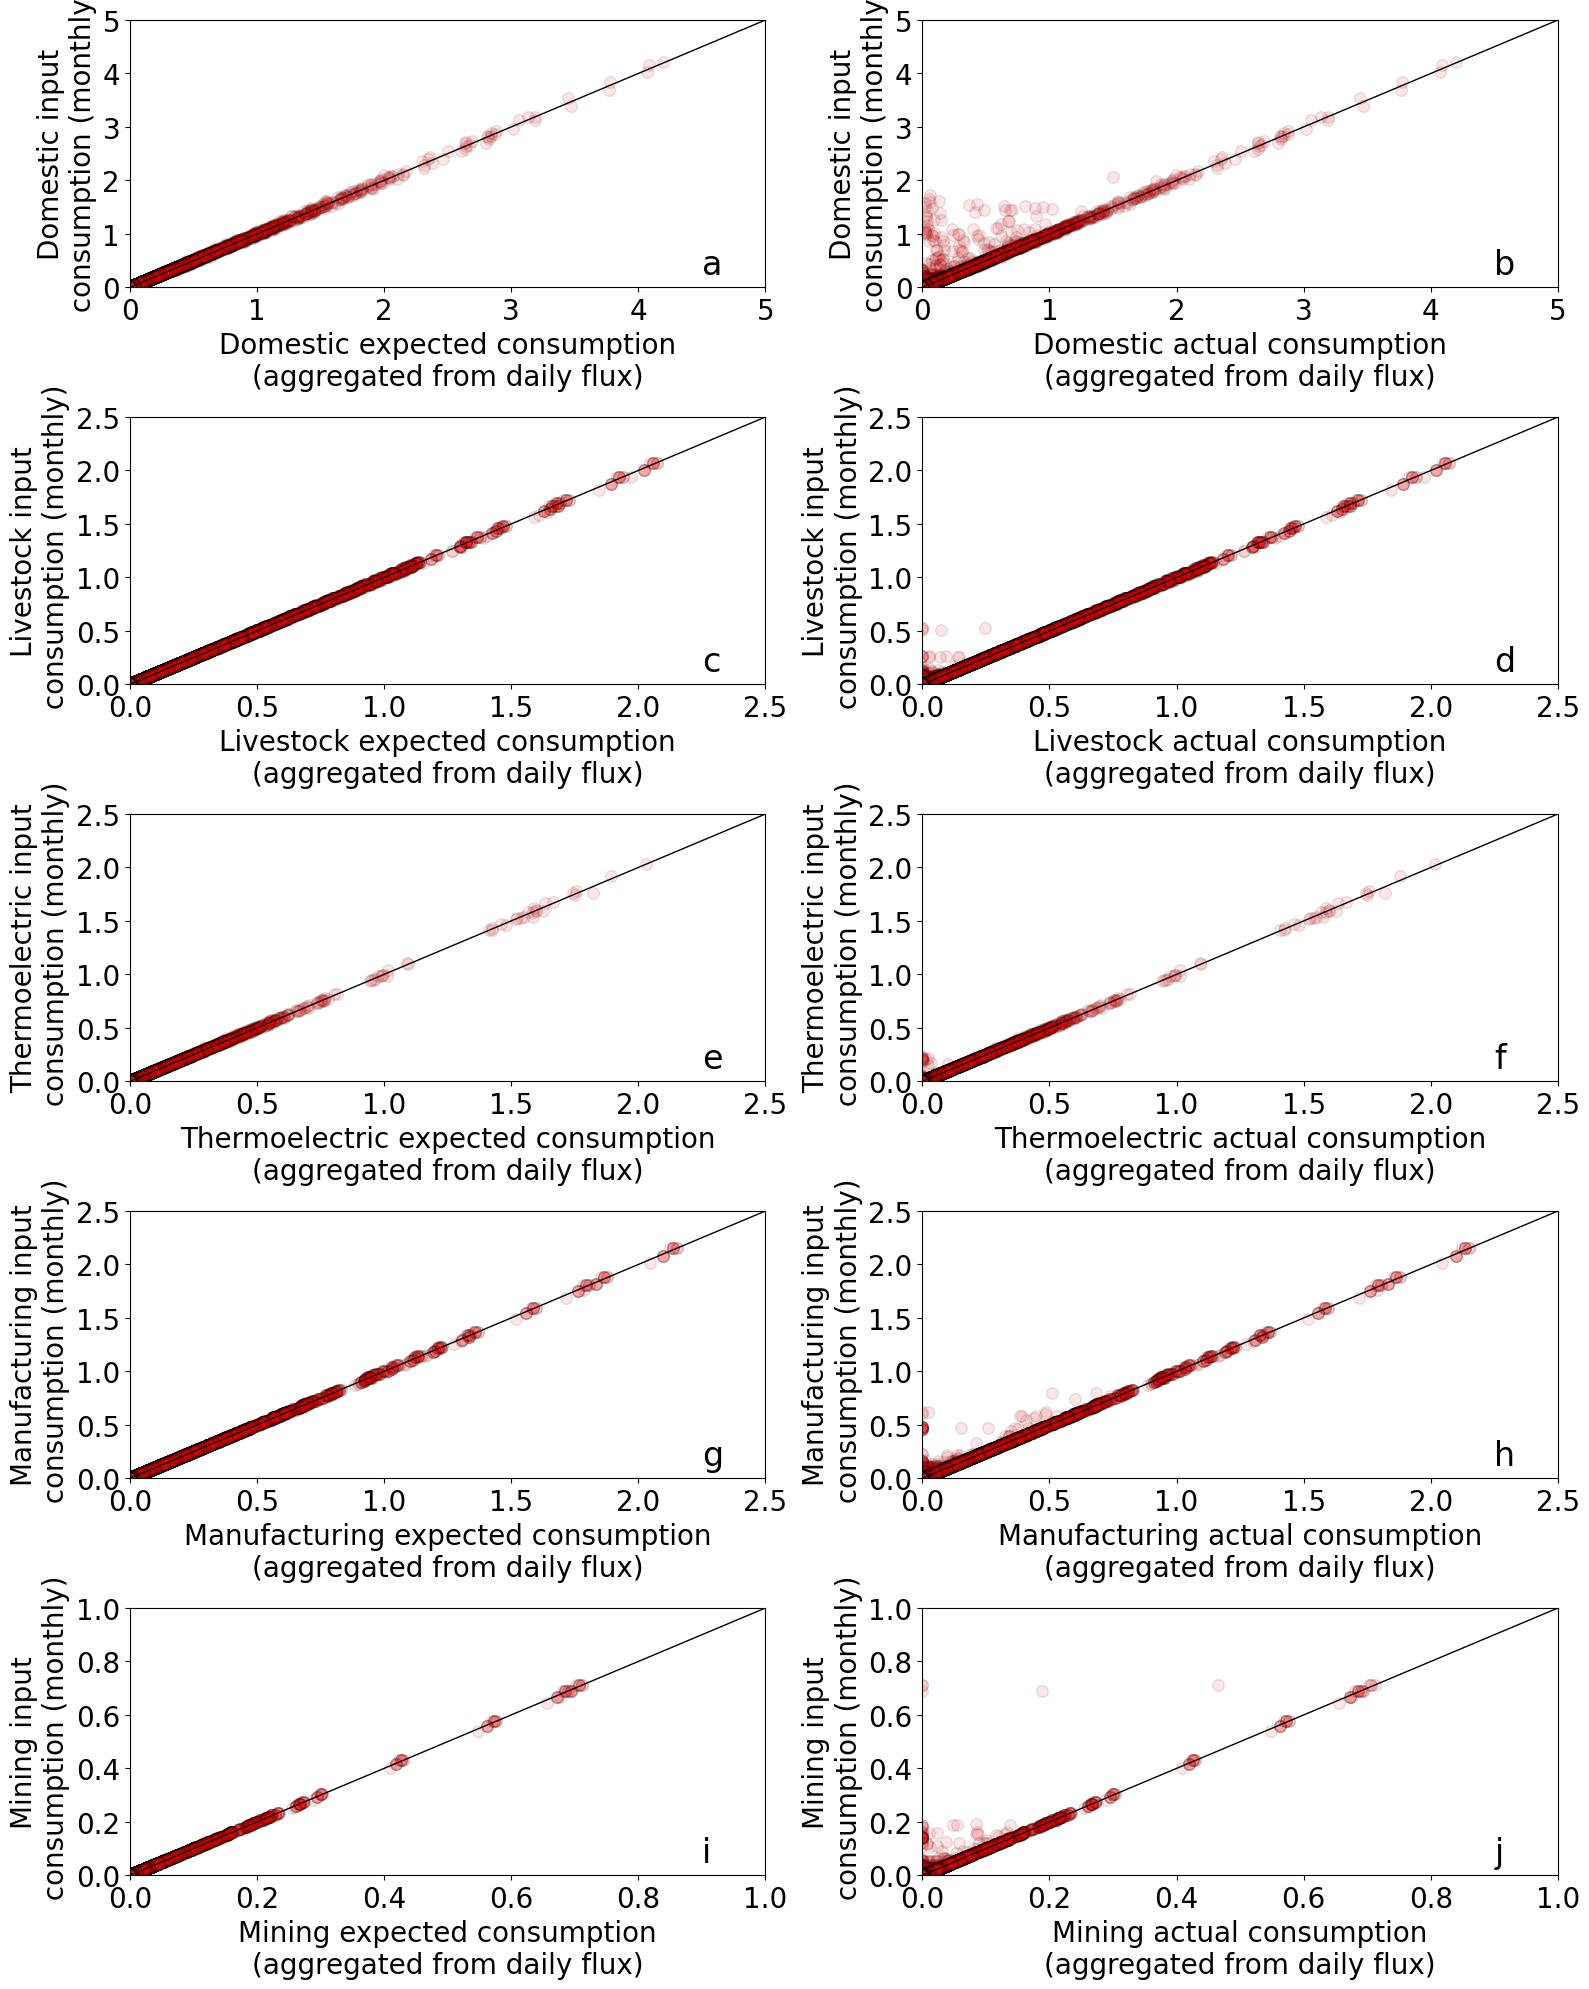

In [5]:
# Create a 5x2 grid of subplots
fig, ax = plt.subplots(5, 2, figsize=(16, 20))

# Define the sectors and their labels
sectors = ['DOM', 'LIV', 'ELEC', 'MFC', 'MIN']
labels = ['Domestic', 'Livestock', 'Thermoelectric', 'Manufacturing', 'Mining']

# Define axis limits for each sector (user-adjustable)
axis_limits = {
    'DOM': {'xlim': [0, 5], 'ylim': [0, 5]},
    'LIV': {'xlim': [0, 2.5], 'ylim': [0, 2.5]},
    'ELEC': {'xlim': [0, 2.5], 'ylim': [0, 2.5]},
    'MFC': {'xlim': [0, 2.5], 'ylim': [0, 2.5]},
    'MIN': {'xlim': [0, 1], 'ylim': [0, 1]}
}

# Iterate over sectors and axes to plot each sector's data
for i, (sector, label) in enumerate(zip(sectors, labels)):
    # First column: expected consumption
    ax[i, 0].scatter(
        x = sectorwater_simulation_outputs_year_2000[f'{sector}_EXPECTED_CONS'].values[1:,:,:] * 86400,
        y = input_data_year_2000[f'cons_{sector.lower()}'], 
        s=70, alpha=0.1, edgecolors="k", color='red'
    )
    ax[i, 0].set_xlabel(f"{label} expected consumption\n(aggregated from daily flux)")
    ax[i, 0].set_ylabel(f"{label} input\n consumption (monthly)")
    ax[i, 0].set_xlim(axis_limits[sector]['xlim'])
    ax[i, 0].set_ylim(axis_limits[sector]['ylim'])
    ax[i, 0].annotate(chr(97 + i*2), xy=(0.9, 0.05), xycoords='axes fraction', fontsize=24, color='k')
    b, a = np.polyfit(axis_limits[sector]['xlim'], axis_limits[sector]['ylim'], deg=1)
    xseq = np.linspace(axis_limits[sector]['xlim'][0], axis_limits[sector]['xlim'][1], num=100)
    ax[i, 0].plot(xseq, a + b * xseq, color="k", lw=1.0)

    # Second column: actual consumption
    ax[i, 1].scatter(
        x = sectorwater_simulation_outputs_year_2000[f'{sector}_ACTUAL_CONS'].values[1:,:,:] * 86400,
        y = input_data_year_2000[f'cons_{sector.lower()}'], 
        s=70, alpha=0.1, edgecolors="k", color='red'
    )
    ax[i, 1].set_xlabel(f"{label} actual consumption\n(aggregated from daily flux)")
    ax[i, 1].set_ylabel(f"{label} input\n consumption (monthly)")
    ax[i, 1].set_xlim(axis_limits[sector]['xlim'])
    ax[i, 1].set_ylim(axis_limits[sector]['ylim'])
    ax[i, 1].annotate(chr(98 + i*2), xy=(0.9, 0.05), xycoords='axes fraction', fontsize=24, color='k')
    b, a = np.polyfit(axis_limits[sector]['xlim'], axis_limits[sector]['ylim'], deg=1)
    xseq = np.linspace(axis_limits[sector]['xlim'][0], axis_limits[sector]['xlim'][1], num=100)
    ax[i, 1].plot(xseq, a + b * xseq, color="k", lw=1.0)

# Adjust font size for all axes
for axis in ax.flatten():
    for item in ([axis.title, axis.xaxis.label, axis.yaxis.label] +
                axis.get_xticklabels() + axis.get_yticklabels()):
        item.set_fontsize(20)

# Adjust layout
fig.tight_layout()

#Save plot
plt.savefig("Results/png_format/input_vs_model_cons.png", format='png', edgecolor='none', dpi=600, bbox_inches='tight', pad_inches=0.5)
# Show the plot
plt.show()

